# Lyrics Analysis

The goal of this project is to perform the following: 

- A exploratory analysis of the __[5 Million Songs Dataset](https://www.kaggle.com/datasets/nikhilnayak123/5-million-song-lyrics-dataset?resource=download)__
- Build a classification model that aims to determine the genre of music given a set of lyrics
    - Evaluate the resulting model
- Build a generative model that produces a set of lyrics given a genre and keyword

## Dataset Description

The 5 Million Songs dataset is hosted on Kaggle.com. According to the dataset descriptor, the dataset contains 3,540,784 unique song titles and is scraped from __[Genius.com](https://genius.com/)__ by the dataset author, __[Nikhil Nayak](https://www.kaggle.com/nikhilnayak123)__. The dataset has the following attributes:

- Title (song title)
- Tag (genre)
- Artist
- Year
- Views (of the lyrics on genius.com)
- Features (other artists who feature on the track)
- Lyrics

The dataset itself has a uncompressed size of 9.21GB and is in a CSV format.

## Exploratory Data Analysis (EDA)

As our main focus is on the lyrics and genres, this will be the primary focus in the exploratory analysis. Due to the size of the dataset, we will be using the Modin library in place of Pandas. We will also only be loading the 'lyrics' and 'tag' columns of the dataset to save some memory (users with limitations on available memory still may wish to load a chunk of the dataset). The advantage of Modin is the syntax and functionality is the same as Pandas however, unlike Pandas, Modin automatically distributes workloads across all the cores on machine. This means we will be able to continue to use the syntax and functionality we're familiar with but with faster processing times. 

##### Setup and Data Loading

In [17]:
import pandas as pd


In [18]:
df = pd.read_csv("ds2.csv", sep = "," , usecols=['id','lyrics', 'tag'])

#### Exploring the Data

In [25]:
display(df.head(n=10))
display(df.shape)
display(df.isnull().sum())

,tag,lyrics,id
0,rap,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1
1,rap,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3
2,rap,Maybe cause I'm eatin\nAnd these bastards fien...,4
3,rap,[Produced by Kanye West and Brian Miller]\n\n[...,5
4,rap,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6
5,rap,[Intro: Lil Wayne]\nHaha\nUh-huh\nNo homo (You...,7
6,rap,"[Intro: Pusha T]\nNo, no, no!\nI told you, I l...",8
7,rap,"[Verse 1: Cam'ron]\nKilla, Dipset\nMan I spit ...",9
8,rap,[Verse 1]\nAy yo you wonder who I are\nI guzzl...,10
9,rap,"[Chorus: Jaheim]\nNow Lord you know, just how ...",11


(5913411, 3)

tag          0
lyrics    2132
id           0
dtype: int64

Through use of ```python df.head()```, we can already gather a few considerations for the dataset. For one, the lyrics include notes for various sections of the song (intro, verse, chorus etc.). We may wish to remove these later by removing all square brackets and all text within the brackets. Addtionally, we can also see the ```\n``` line seperator is present within the text with no spaces between the preceeding and succeeding words. We may also wish to remove these later as they may cause issues during tokenisation. 

The  result of ```df.shape()``` being ```(5913411, 3)``` is also far greater than the the number of unique song titles. It is likely then that there are large number of songs that share the same title. It may be the case that there is a number of duplicate values. 

We can also see through ```df.isnull()``` that there are 2132 records where the lyrics are missing. This is likely due to a number of songs in the dataset being instrumentals. As our focus is classifying songs based on lyrics, we shall drop these records.

Finally, we see from the 'tag' column that the top 10 rows are all rap songs. After determining if there are duplicate records, we will produce a bar graph to determine the distribution of the songs by genre.

In [26]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.shape

(5911279, 3)

Following the dropping duplicate and null records, we now have 5,911,279 records. This is 765,015 less than the original dataset.

We will now produce a bar graph showing the distribution of songs by genre:

pop        2519256
rap        1962010
rock        892220
rb          225342
misc        208714
country     105869
Name: tag, dtype: int64

pop        0.426024
rap        0.331790
rock       0.150881
rb         0.038107
misc       0.035295
country    0.017903
Name: tag, dtype: float64

<Axes: >

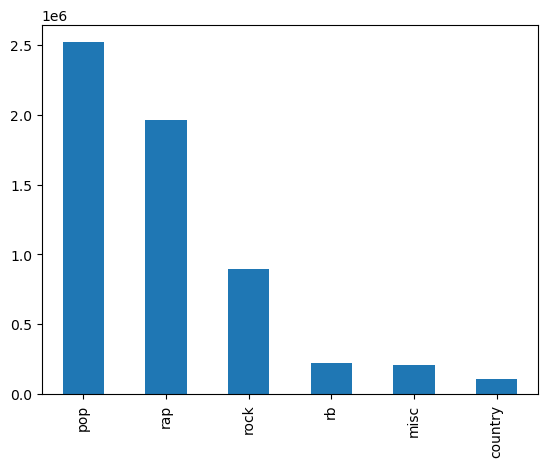

In [24]:
display(df['tag'].value_counts())
display(df['tag'].value_counts(normalize=True))
df['tag'].value_counts().plot(kind='bar')

From the above graph, we can determine that 'Pop' is the majority class, representing over 40% of the dataset with 2,519,256 records. In contrast, 'Country' is the minority class, representing only 1.7% of the dataset with 105,869. It may be the case when building the classifier later, that we undersample the majority classes to match the 'Country' class in order to create a balanced dataset. The resulting dataset should still be fairly significant in size at 635,214 records (6 * 105,859).